# Exercise 1
If you have trained five different models on the exact same training data, and
they all achieve 95% precision, is there any chance that you can combine these
models to get better results? If so, how? If not, why?

Yes, it can achieve higher precission. By the law of the large numbers. If the models where independent then accuracy would approach 100%.

# Exercise 2
What is the difference between hard and soft voting classifiers?

Hard voting is the most frequent prediction while soft voting is the highest probability for a class averaged over all classifiers.

# Exercises 3
Is it possible to speed up training of a bagging ensemble by distributing it across
multiple servers? What about pasting ensembles, boosting ensembles, random
forests, or stacking ensembles?

Bagging, pasting, random forests can be distributed across multiple servers, boosting ensembles on the other hand can't be distributed cause we need to wait for the previous predictions. When it comes to stacking- we can train in paralell different layers but we need to wait for them to blend them.

# Exercise 4
What is the benefit of out-of-bag evaluation?

If we use the OOB evaluation then we do not need the validation set. 

# Exercise 5
What makes extra-trees ensembles more random than regular random forests?
How can this extra randomness help? Are extra-trees classifiers slower or faster
than regular random forests?

In the case of extra-trees ensembles we use random tresholds for splitting node by features. The training is much faster because finding the optimal treshold is computationaly challenging. This extra randomness may help or may not depending on the case.

# Exercise 6
If your AdaBoost ensemble underfits the training data, which hyperparameters
should you tweak, and how?

You can increase the number of estimators or reduce the regularization of the base estimator.

# Exercise 7
If your gradient boosting ensemble overfits the training set, should you increase
or decrease the learning rate?

You should increase the learning rate. </br> 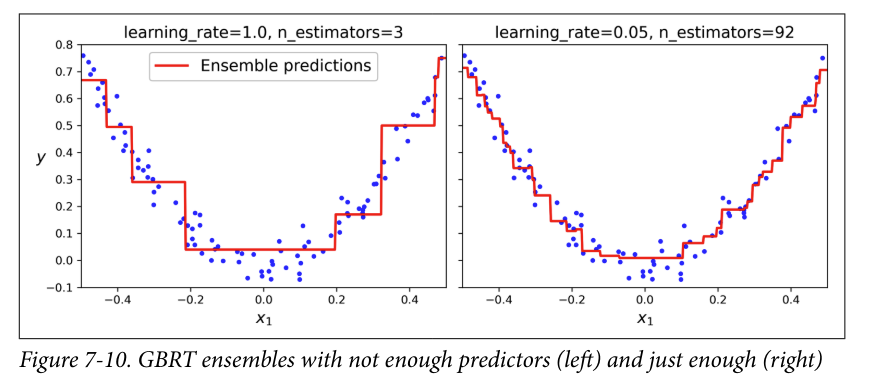

# Exercise 8
Load the MNIST dataset (introduced in Chapter 3), and split it into a training
set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000
for validation, and 10,000 for testing). Then train various classifiers, such as a
random forest classifier, an extra-trees classifier, and an SVM classifier. Next, try
to combine them into an ensemble that outperforms each individual classifier
on the validation set, using soft or hard voting. Once you have found one, try
it on the test set. How much better does it perform compared to the individual
classifiers?

In [1]:
from sklearn.model_selection import train_test_split

def train_valid_test_split(X, y, train_size=0.7, valid_size=0.2, test_size=0.1):
    assert round((train_size + valid_size + test_size), 2) == 1.0
    valid_test_size = valid_size + test_size
    X_train, X_valid_test, y_train, y_valid_test = train_test_split(X, y, test_size=valid_test_size, train_size=train_size)
    new_valid_size = round(valid_size / (valid_size + test_size), 2)
    new_test_size = 1.0 - new_valid_size
    X_valid, X_test, y_valid, y_test = train_test_split(X_valid_test, y_valid_test, train_size=new_valid_size, test_size= new_test_size)
    return X_train, X_valid, X_test, y_train, y_valid, y_test

In [2]:
from sklearn.datasets import load_digits

X, y = load_digits(as_frame=True, return_X_y=True)

X_train, X_valid, X_test, y_train, y_valid, y_test = train_valid_test_split(X, y)

In [3]:
len(X_train), len(X_valid), len(X_test)
y_train

93      1
475     3
1205    0
1753    7
1135    7
       ..
859     3
82      6
506     5
55      0
1700    5
Name: target, Length: 1257, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, n_jobs=-1, random_state=42)

In [18]:
rf_clf.score(X_valid, y_valid)

0.9750692520775623

In [6]:
from sklearn.ensemble import ExtraTreesClassifier

etr_clf = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)
etr_clf.fit(X_train, y_train)

ExtraTreesClassifier(n_jobs=-1, random_state=42)

In [7]:
etr_clf.score(X_valid, y_valid)

0.9861495844875346

In [8]:
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train, y_train)

SVC()

In [9]:
svc_clf.score(X_valid, y_valid)

0.9916897506925207

In [28]:
from sklearn.ensemble import VotingClassifier

voting_clf_hard = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1)),
        ("etr", ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
        ("svc", SVC(probability=True))
    ],
    n_jobs=-1,
    voting='hard'
)

voting_clf_hard.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=120,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('etr',
                              ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                             ('svc', SVC(probability=True))],
                 n_jobs=-1)

In [29]:
voting_clf_hard.score(X_valid, y_valid)

0.9861495844875346

In [31]:
voting_clf_soft = VotingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1)),
        ("etr", ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
        ("svc", SVC(probability=True))
    ],
    n_jobs=-1,
    voting='soft'
)

voting_clf_soft.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=120,
                                                     n_jobs=-1,
                                                     random_state=42)),
                             ('etr',
                              ExtraTreesClassifier(n_jobs=-1, random_state=42)),
                             ('svc', SVC(probability=True))],
                 n_jobs=-1, voting='soft')

In [32]:
voting_clf_soft.score(X_valid, y_valid)

0.9916897506925207

In [33]:
voting_clf_soft.score(X_test, y_test)

1.0

It outperforms each classifier from 2.5% to 0.84%. When using the soft voting, the ensemble achieves 0.992% accuracy on the valid set and the 100% accuracy on the test set.

# Exercise 9
Run the individual classifiers from the previous exercise to make predictions on
the validation set, and create a new training set with the resulting predictions:
each training instance is a vector containing the set of predictions from all your
classifiers for an image, and the target is the image’s class. Train a classifier
on this new training set. Congratulations—you have just trained a blender, and
together with the classifiers it forms a stacking ensemble! Now evaluate the
ensemble on the test set. For each image in the test set, make predictions with all
your classifiers, then feed the predictions to the blender to get the ensemble’s pre‐
dictions. How does it compare to the voting classifier you trained earlier? Now
try again using a StackingClassifier instead. Do you get better performance? If
so, why?

In [41]:
import numpy as np

X_predictions = np.empty((len(X_valid), 3))

for index, estimator in enumerate((rf_clf, etr_clf, svc_clf)):
    X_predictions[:, index] = estimator.predict(X_valid)

X_predictions

array([[9., 9., 9.],
       [7., 7., 7.],
       [6., 6., 6.],
       ...,
       [6., 6., 6.],
       [3., 3., 3.],
       [1., 1., 1.]])

In [47]:
rnd_forest_blender = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, oob_score=True)
rnd_forest_blender.fit(X_predictions, y_valid)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [48]:
rnd_forest_blender.oob_score_

0.9861495844875346

In [53]:
X_predictions_test = np.empty((len(X_test), 3))

for index, estimator in enumerate((rf_clf, svc_clf, etr_clf)):
    X_predictions_test[:, index] = estimator.predict(X_test)

X_predictions_test[:5]

array([[9., 9., 9.],
       [6., 6., 6.],
       [8., 8., 8.],
       [6., 6., 6.],
       [9., 9., 9.]])

In [57]:
y_predictions_test_blender = rnd_forest_blender.predict(X_predictions_test)

In [59]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_predictions_test_blender)

1.0

Accuracy on the test set is 100% 

In [62]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ("rf", RandomForestClassifier(n_estimators=120, random_state=42, n_jobs=-1)),
        ("etr", ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
        ("svc", SVC(probability=True))
    ],
    n_jobs=-1,
    final_estimator=RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42, oob_score=True),
    cv=5
)

In [63]:
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(n_estimators=120,
                                                       n_jobs=-1,
                                                       random_state=42)),
                               ('etr',
                                ExtraTreesClassifier(n_jobs=-1,
                                                     random_state=42)),
                               ('svc', SVC(probability=True))],
                   final_estimator=RandomForestClassifier(n_jobs=-1,
                                                          oob_score=True,
                                                          random_state=42),
                   n_jobs=-1)

In [64]:
stacking_clf.score(X_test, y_test)

1.0